In [2]:
import cm1.input.sounding
import cm1.input.era5
from cm1.skewt import skewt
import matplotlib.pyplot as plt
import pandas as pd
from metpy.units import units

ERROR:root:p_bot<0 -21.21126641435135 hPa dp -40.8836612783454 hPa * kg * m ** 2 / J / s ** 2 dz 15850.0 m T 260.5575359138379 K. set to 0 hPa
ERROR:root:p_bot<0 -10.966134588649531 hPa dp -33.33575215779468 hPa * kg * m ** 2 / J / s ** 2 dz 16133.0 m T 369.85402990243404 K. set to 0 hPa
ERROR:root:p_bot<0 -11.22228422066572 hPa dp -33.488177333262385 hPa * kg * m ** 2 / J / s ** 2 dz 16029.0 m T 364.10107273765806 K. set to 0 hPa
ERROR:root:p_bot<0 -8.03891958846869 hPa dp -23.833388705005724 hPa * kg * m ** 2 / J / s ** 2 dz 14375.0 m T 325.45729513655 K. set to 0 hPa
ERROR:root:p_bot<0 -23.302988182308418 hPa dp -53.61896272578618 hPa * kg * m ** 2 / J / s ** 2 dz 19274.0 m T 372.2990265072188 K. set to 0 hPa


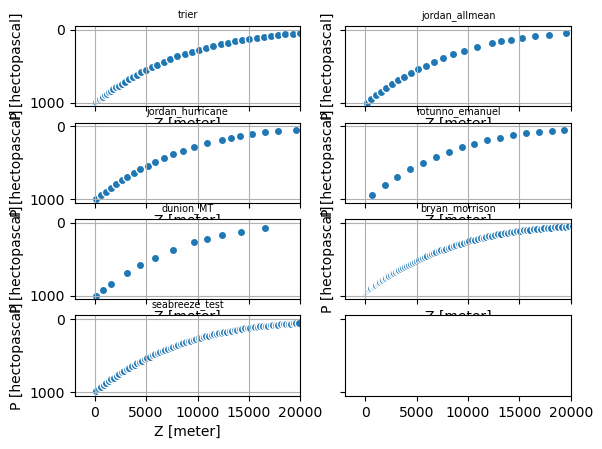

In [3]:
dss = [
    cm1.input.sounding.trier(),
    cm1.input.sounding.jordan_allmean(),
    cm1.input.sounding.jordan_hurricane(),
    cm1.input.sounding.rotunno_emanuel(),
    cm1.input.sounding.dunion_MT(),
    cm1.input.sounding.bryan_morrison(),
    cm1.input.sounding.seabreeze_test(),
]
fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, sharey=True)
for ds, ax in zip(dss, axes.flat):
    pc = ds.plot.scatter(ax=ax, x="Z", y="P")
    pc.axes.set_title(ds.case.item(), fontsize="x-small")
    pc.axes.invert_yaxis()
    pc.axes.grid()
    pc.axes.set_xlim(right=20000)

/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1404: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1405: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)
/glade/derecho/scratch/ahijevyc/cm1/cm1/skewt.py:312: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1404: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1405: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)


t_parcel 299.8620755304671 K Td_parcel 24.82323027898525 °C q_parcel 20.0 g / kg
t_parcel 297.849370084934 K Td_parcel 21.00627685867579 °C q_parcel 15.6 g / kg


/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1404: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1405: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)


t_parcel 299.4513202276624 K Td_parcel 23.44983813612447 °C q_parcel 18.2 g / kg
t_parcel 297.2601576479928 K Td_parcel 22.138051855101935 °C q_parcel 16.77 g / kg
t_parcel 299.9513324843609 K Td_parcel 23.82940314499558 °C q_parcel 18.6396 g / kg


/glade/derecho/scratch/ahijevyc/cm1/cm1/skewt.py:312: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)


t_parcel 303.4217848690688 K Td_parcel 20.022747791017423 °C q_parcel 15.491 g / kg


t_parcel 300.5 K Td_parcel 3.7224868413096033 °C q_parcel 5.0 g / kg


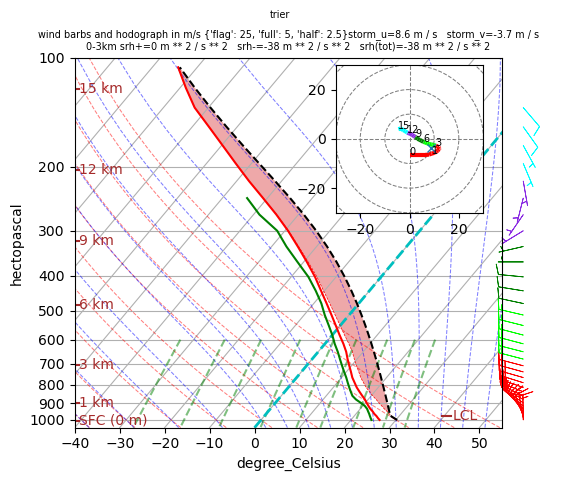

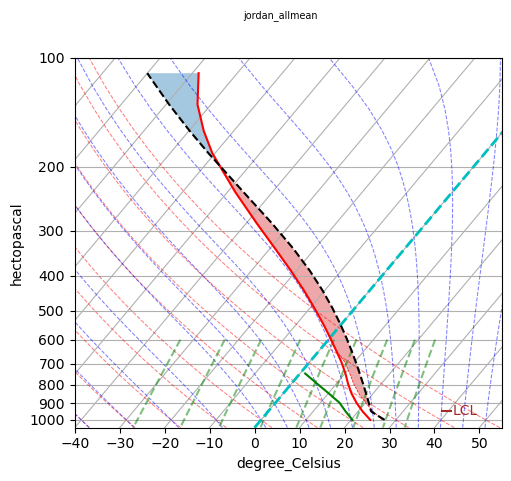

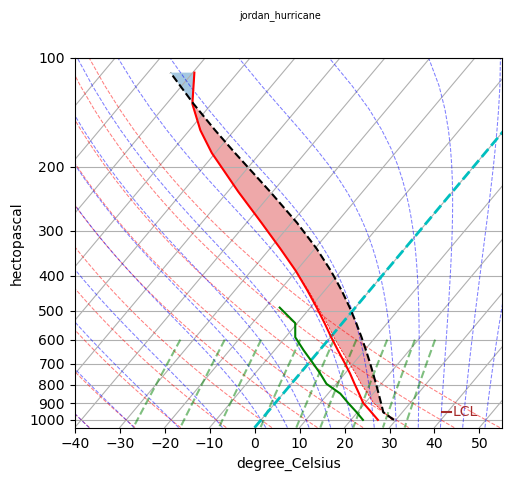

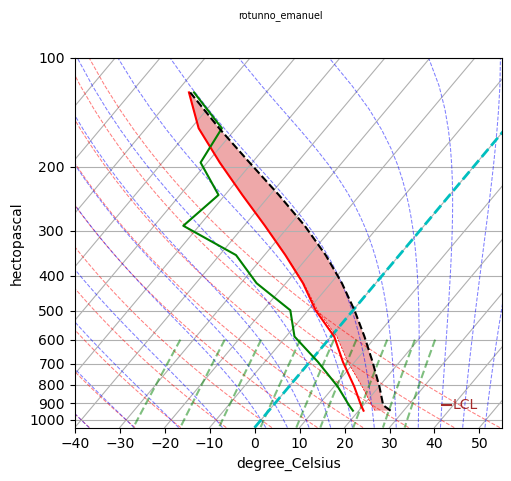

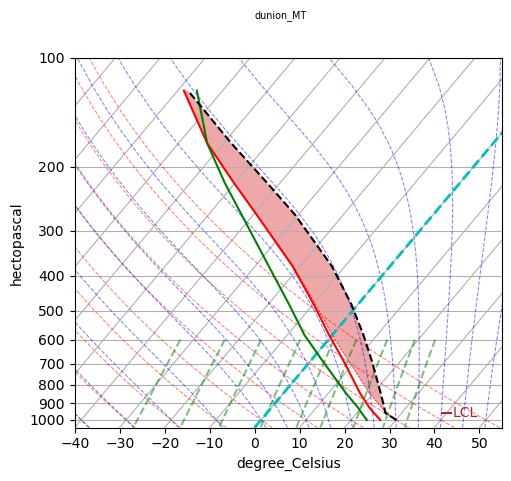

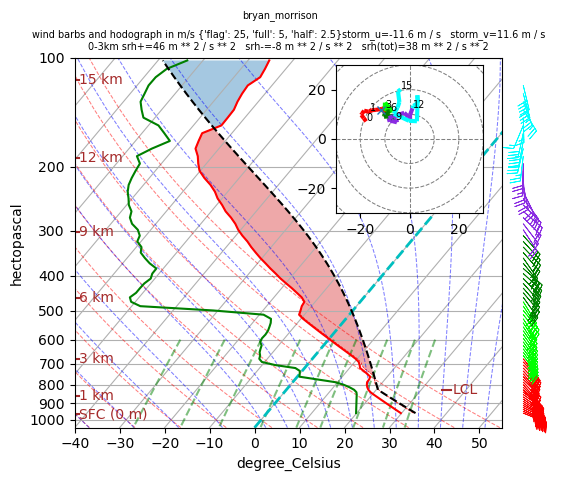

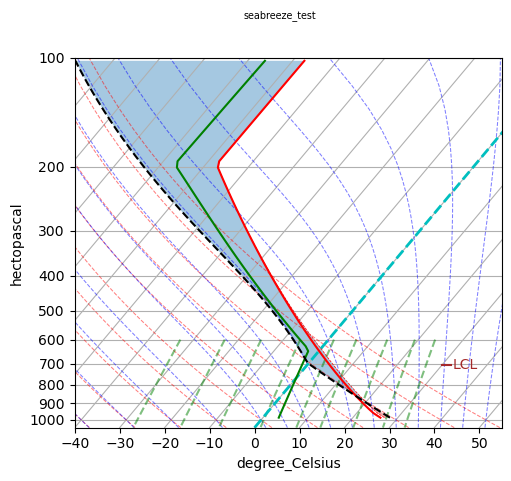

In [4]:
for ds, ax in zip(dss, axes.flat):
    skewt(ds)
    plt.suptitle(ds.case.item(), fontsize="x-small")

In [ ]:
print(ds.P)
import metpy.calc as mpcalc

t_parcel = mpcalc.temperature_from_potential_temperature(
    ds.SP, ds.surface_potential_temperature
)
q_parcel = ds.surface_mixing_ratio
Td_parcel = mpcalc.dewpoint(mpcalc.saturation_vapor_pressure(t_parcel))
print(f"t_parcel {t_parcel:~} Td_parcel {Td_parcel:~} q_parcel {q_parcel:~}")

mpcalc.parcel_profile(ds.P, t_parcel, Td_parcel)

<xarray.DataArray 'P' (level: 80)> Size: 640B
<Quantity([985.78879148 957.66146633 930.15596278 903.26705004 876.98807199
 851.31151716 826.22933965 801.73310557 777.8141003  754.46343975
 731.67207919 709.43088124 687.73065483 666.56216259 645.91616871
 625.78343523 606.15475164 587.02093008 568.37283196 550.20138542
 532.49756109 515.25241244 498.45706239 482.1027234  466.18068454
 450.68233019 435.5991323  420.92266701 406.64460212 392.7567082
 379.25086384 366.11904388 353.35333711 340.94593064 328.88912635
 317.17533309 305.79706375 294.74694931 284.01772146 273.60222621
 263.49342296 253.68437184 244.16824595 234.9383275  225.9880072
 217.31078361 208.90025989 200.75014831 192.88658056 185.33142263
 178.07256799 171.09838507 164.39770043 157.95977693 151.77430192
 145.83136844 140.12145594 134.63541703 129.36446689 124.3001645
 119.43440045 114.7593827  110.26762639 105.95193943 101.80541411
  97.82141173  93.99355593  90.3157204   86.78201814  83.38679462
  80.12461758  76.99026

Magnitude,[300.5 299.57706068671786 298.6448347228036 297.70309855916196 296.7515841162281 295.78997278030675 294.8179062871521 293.83499290505284 292.84080404101707 291.83487491858295 290.81670225407896 289.7857430563745 288.7414089725507 287.68306696987474 286.6100384200816 285.5215912876817 284.4169366120165 283.2952285253892 282.15555265733866 280.9969313958786 279.8183052377653 278.6185378119884 277.3964068746248 276.15060120051726 274.8797070712634 273.5822161673907 272.25650239357583 270.90083325692365 269.5133598853627 268.0921196340441 266.63503660217395 265.1399262980228 263.6045070361902 262.026422469495 260.40326330239066 258.7326063831969 257.0120642518452 255.23934708749772 253.41234229325136 251.5292001026479 249.5884521275475 247.58910963940616 245.53078120952088 243.4137806016264 241.23920034870275 239.00895874967196 236.72579485834152 234.39322221902992 232.0253944493533 229.6374963036815 227.23517256159056 224.82394279398707 222.40903709108574 219.99526984603727 217.58695877875536 215.1878814333725 212.80127035454365 210.42983501765644 208.07579795901077 205.74094947197284 203.42669655816928 201.13411954894815 198.86402813027652 196.61700534427635 194.39344690629233 192.19360670253943 190.01761325649787 187.86550088320837 185.73723220419282 183.6327194910159 181.55182559412336 179.4943806175966 177.4601940342455 175.4490574383473 173.46074877910084 171.49503805827482 169.5516886782189 167.63046515824476 165.7311236209124 163.85342265371625]
Units,kelvin


/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1404: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1405: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)


t_parcel 297.849370084934 K Td_parcel 21.00627685867579 °C q_parcel 15.6 g / kg


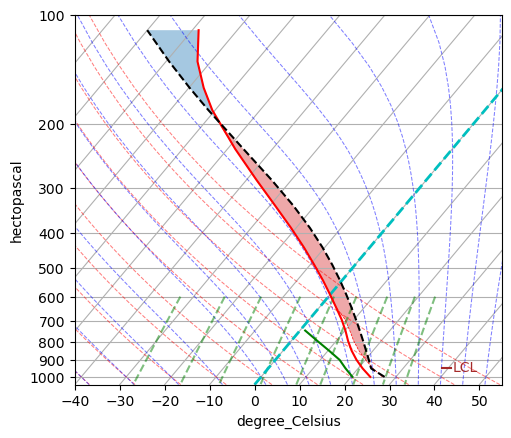

In [7]:
ds = dss[1]
skewt(ds)

In [5]:
valid_time = pd.to_datetime("20231225")
ds0 = cm1.input.era5.get(valid_time, campaign=True, model_levels=True)
ds0

<xarray.Dataset> Size: 6GB
Dimensions:     (latitude: 640, level: 137, longitude: 1280, half_level: 138)
Coordinates:
  * latitude    (latitude) float64 5kB 89.78 89.51 89.23 ... -89.51 -89.78
  * level       (level) int32 548B 1 2 3 4 5 6 7 ... 131 132 133 134 135 136 137
  * longitude   (longitude) float64 10kB 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
  * half_level  (half_level) int32 552B 1 2 3 4 5 6 ... 133 134 135 136 137 138
    time        datetime64[ns] 8B 2023-12-25
Data variables: (12/17)
    Q           (level, latitude, longitude) float32 449MB <Quantity(dask.arr...
    a_half      (half_level) float64 1kB <Quantity(dask.array<where, shape=(1...
    a_model     (level) float64 1kB <Quantity(dask.array<where, shape=(137,),...
    b_half      (half_level) float64 1kB <Quantity(dask.array<where, shape=(1...
    b_model     (level) float64 1kB <Quantity(dask.array<where, shape=(137,),...
    weight      (latitude) float64 5kB <Quantity(dask.array<where, shape=(640...
    ...          ...
    P           (level, latitude, longitude) float64 898MB <Quantity(dask.arr...
    P_half      (half_level, latitude, longitude) float64 904MB <Quantity(das...
    Zsfc        (latitude, longitude) float32 3MB <Quantity([[ 5.61217368e-01...
    Tv          (level, latitude, longitude) float32 449MB <Quantity(dask.arr...
    Z_half      (half_level, latitude, longitude) float64 904MB <Quantity(das...
    Z           (level, latitude, longitude) float64 898MB <Quantity(dask.arr...
Attributes: (12/18)
    RDA_DATASET:                            ds633.6
    RDA_DATASET_URL:                        https:/rda.ucar.edu/datasets/ds63...
    RDA_DATASET_DOI:                        DOI: 10.5065/XV5R-5344
    RDA_DATASET_GROUP:                      ERA5 atmospheric model level anal...
    DATA_SOURCE:                            Downloaded by NCAR/CISL/DECS from...
    DOWNLOAD_SPECIALIST:                    Chi-Fan Shih, NCAR/CISL/DECS, chi...
    ...                                     ...
    NETCDF_COMPRESSION:                     Precision-preserving compression ...
    CONVERSION_AND_COMPRESSION_PLATFORM:    casper node employed: Linux crhtc...
    CONVERSION_AND_COMPRSSION_DATE:         Fri 10 May 2024 08:39:16 PM MDT
    CONVERSION_AND_COMPRESSION_SPECIALIST:  Dave Stepaniak, NCAR/CISL/DECS, d...
    history:                                Fri May 10 20:39:33 2024: ncks -4...
    NCO:                                    netCDF Operators version 5.1.9 (H...

In [ ]:
lon = -1 * units.degree_E
lat = 0.01 * units.degree_N
neighbors = 9
debug = True

s = cm1.utils.era5_circle_neighborhood(ds0, lon, lat, neighbors, debug=debug)
s

/glade/derecho/scratch/ahijevyc/cm1/cm1/skewt.py:278: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)


[295.5346984863281 294.97955322265625 294.60028076171875 294.25604248046875 293.9157409667969 293.5965576171875 293.240234375 292.8514404296875 292.45379638671875 292.02734375 291.5794677734375 291.0824279785156 290.5201416015625 289.922607421875 289.38922119140625 288.767578125 288.36444091796875 288.16845703125 288.0582275390625 287.5684814453125 286.83362826468004 286.6443176269531 285.6854553222656 284.6292419433594 283.61920166015625 282.50921630859375 281.2431640625 279.95159912109375 278.6117858886719 277.16583251953125 275.8608703613281 274.50140380859375 273.133056640625 271.927734375 270.4945068359375 269.2424011230469 267.96600341796875 266.294189453125 264.883056640625 263.397216796875 261.8387451171875 260.0835266113281 258.07806396484375 255.9267578125 253.73590087890625 251.56817626953125 249.45428466796875 247.41070556640625 245.40420532226562 243.27528381347656 241.09059143066406 238.88397216796875 236.74826049804688 234.7512969970703 232.84304809570312 231.07569885253

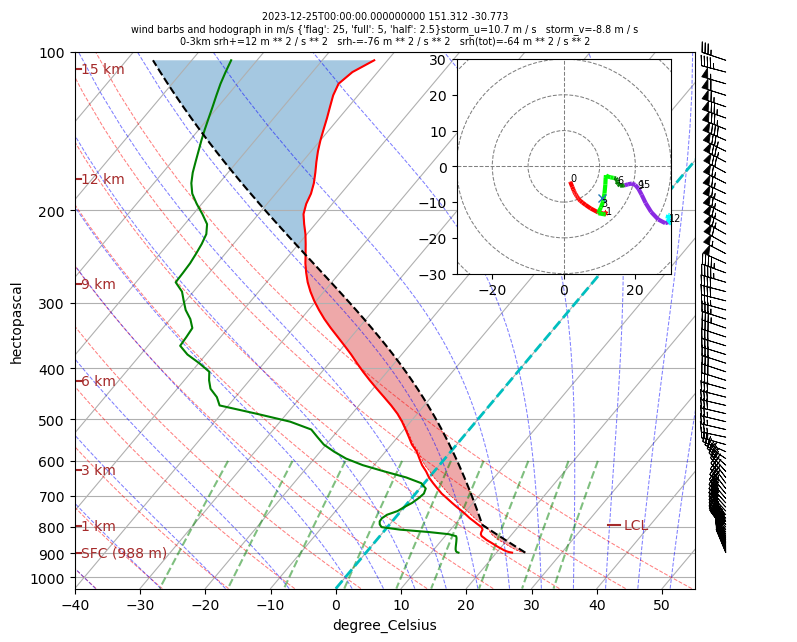

In [10]:
longitude = 151.2
latitude = -30.8
ds = ds0.sel(longitude=longitude, latitude=latitude, method="nearest")
fig = plt.figure(figsize=(8, 8))
skewt(ds, fig=fig)

/glade/derecho/scratch/ahijevyc/cm1/cm1/skewt.py:278: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)


[287.5776672363281 287.70025634765625 287.69793701171875 287.65057373046875 287.5739440917969 287.5260199049899 287.4696044921875 287.3515625 287.2264404296875 287.08465576171875 286.93359375 286.7786865234375 286.6273498535156 286.4927978515625 286.340576171875 286.15875244140625 285.935546875 285.59686279296875 285.26806640625 284.8590087890625 284.2891845703125 283.6697082519531 283.1424865722656 282.5491638183594 281.64654541015625 280.81781005859375 280.2509765625 279.79730224609375 279.1645202636719 277.82403564453125 275.9692687988281 274.53460693359375 273.585205078125 273.12890625 272.4007568359375 271.3507995605469 270.16326904296875 268.840087890625 267.478759765625 266.075927734375 264.5975341796875 262.9536437988281 261.12298583984375 259.1640625 257.18707275390625 255.15802001953125 252.96600341796875 250.85601806640625 248.70010375976562 246.43934631347656 244.06910705566406 241.71112060546875 239.34298706054688 236.9290313720703 234.52273559570312 232.18116760253906 229

[294.1733703613281 293.99127197265625 293.80731201171875 293.57049560546875 293.2829284667969 292.9910888671875 292.71875 292.5897216796875 292.69403076171875 292.61149070328423 292.53515625 292.3060302734375 291.8988342285156 291.3345947265625 290.791748046875 290.54742431640625 290.3828125 290.20819091796875 289.86376953125 289.4039306640625 288.8907470703125 288.2673645019531 287.5057678222656 286.6780700683594 285.93756103515625 285.28656005859375 284.5498046875 283.67620849609375 282.7182312011719 281.61212158203125 280.3003234863281 278.83636474609375 276.998291015625 275.595703125 274.3656005859375 273.2267761230469 271.95526123046875 270.420166015625 268.763916015625 267.053466796875 265.2196044921875 263.5727844238281 261.82415771484375 260.3427734375 258.46246337890625 256.52911376953125 254.38006591796875 252.24176025390625 250.08877563476562 247.80946350097656 245.72633361816406 243.71697998046875 241.85177612304688 239.9407501220703 237.82742309570312 235.54347229003906 23

/glade/derecho/scratch/ahijevyc/cm1/cm1/skewt.py:278: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)


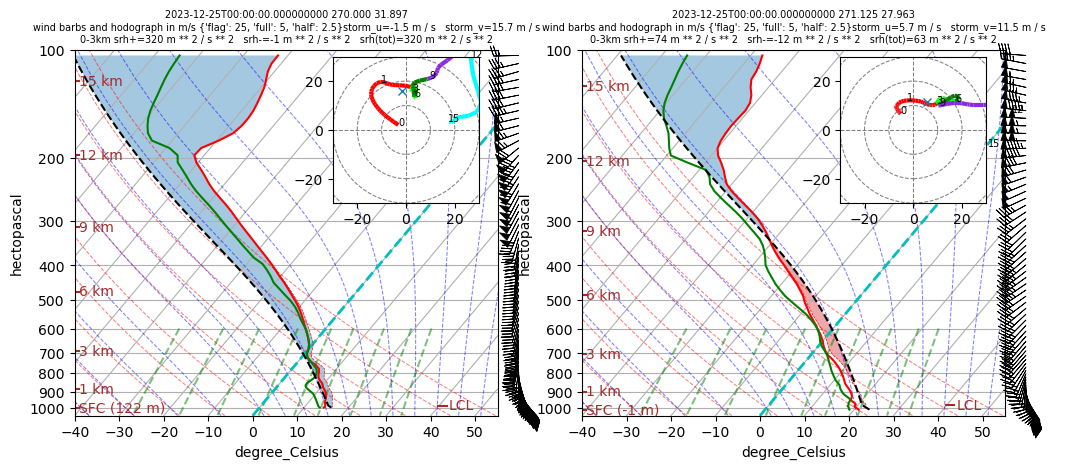

In [11]:
locs = [(270, 32), (271, 28)]

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Initialize SkewT for each subplot
for index, (longitude, latitude) in enumerate(locs):
    ds = ds0.sel(longitude=longitude, latitude=latitude, method="nearest")
    skew = skewt(ds, fig=fig, subplot=(1, 2, index + 1))

In [12]:
ofile = "t.csv"
with open(ofile, "w") as f:
    f.write(cm1.input.sounding.to_txt(ds))

In [ ]:
pd.read_csv(ofile, skiprows=1, sep=" ", names=["z", "theta", "q", "u", "v"])

,z,theta,q,u,v
0,9.332434,293.296407,13.777171,-5.196335,6.587040
1,9.332434,293.296407,13.777171,-5.196335,6.587040
2,9.332434,293.296407,13.777171,-5.196335,6.587040
3,9.332434,293.296407,13.777171,-5.196335,6.587040
4,9.332434,293.296407,13.777171,-5.196335,6.587040
...,...,...,...,...,...
18901,76988.977091,5193.549192,0.001745,13.755211,-3.053879
18902,76988.977091,5193.549192,0.001745,13.755211,-3.053879
18903,76988.977091,5193.549192,0.001745,13.755211,-3.053879
18904,76988.977091,5193.549192,0.001745,13.755211,-3.053879


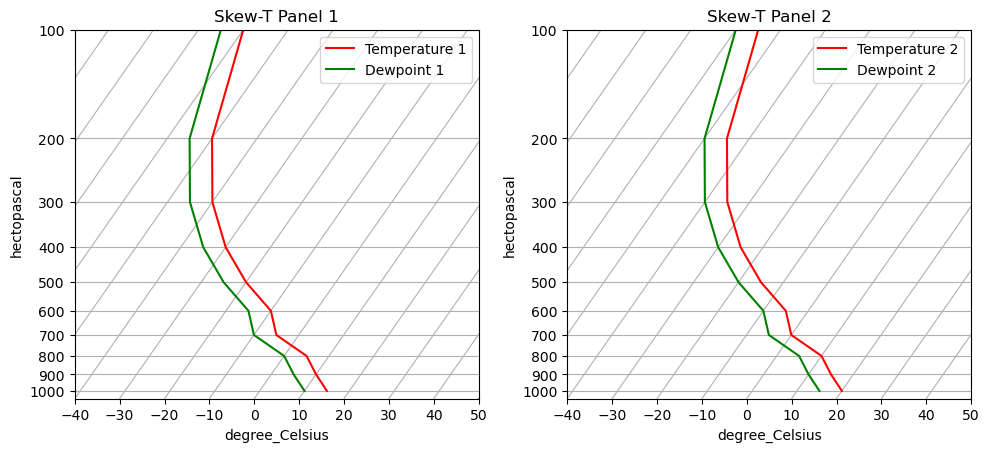

In [ ]:
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
import numpy as np

# Example data
pressure = np.array([1000, 900, 800, 700, 600, 500, 400, 300, 200, 100]) * units.hPa
temperature1 = np.array([15, 10, 5, -5, -10, -20, -30, -40, -50, -60]) * units.degC
temperature2 = np.array([20, 15, 10, 0, -5, -15, -25, -35, -45, -55]) * units.degC
dewpoint1 = np.array([10, 5, 0, -10, -15, -25, -35, -45, -55, -65]) * units.degC
dewpoint2 = np.array([15, 10, 5, -5, -10, -20, -30, -40, -50, -60]) * units.degC

# Create figure with two subplots side by side
fig = plt.figure(figsize=(10, 8))

# First Skew-T plot
skew1 = SkewT(fig, subplot=(1, 2, 1), rotation=35)
skew1.plot(pressure, temperature1, "r", label="Temperature 1")
skew1.plot(pressure, dewpoint1, "g", label="Dewpoint 1")
skew1.ax.set_title("Skew-T Panel 1")
skew1.ax.legend()

# Second Skew-T plot
skew2 = SkewT(fig, subplot=(1, 2, 2), rotation=35)
skew2.plot(pressure, temperature2, "r", label="Temperature 2")
skew2.plot(pressure, dewpoint2, "g", label="Dewpoint 2")
skew2.ax.set_title("Skew-T Panel 2")
skew2.ax.legend()

plt.tight_layout()
plt.show()